# Final Project Submission

### Student Name: Natalya Doris
### Student Pace: Flex / 40 weeks
### Scheduled Project Review Date / Time:
### Instructor Name: Abhineet Kulkarni
### Blog Post URL:

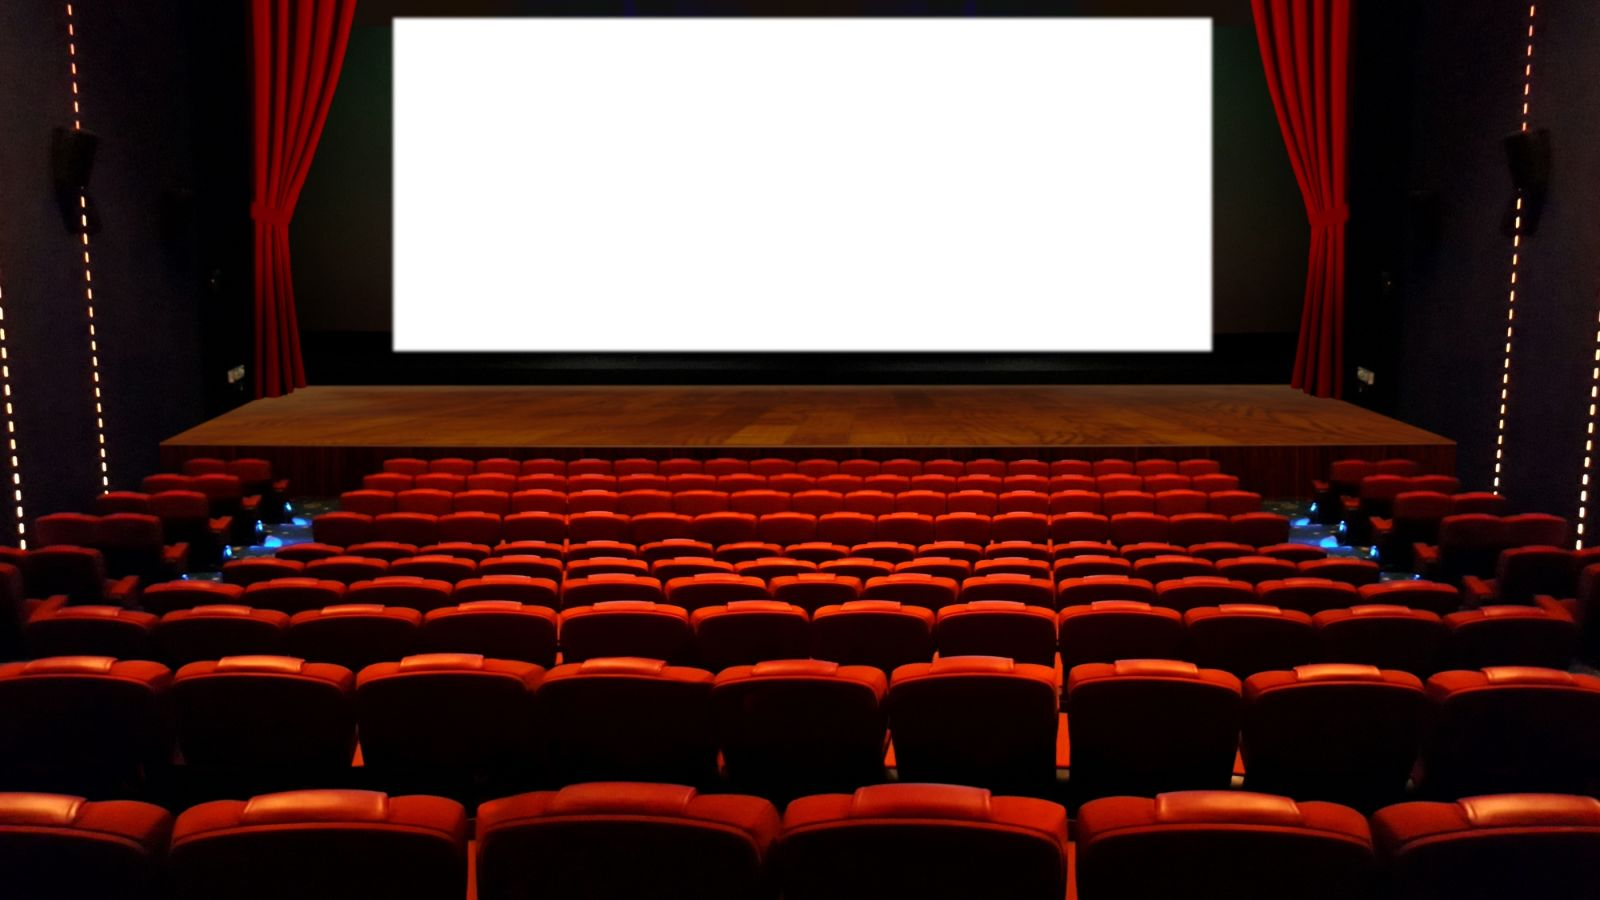

Source: US Chamber of Commerce Foundation
(https://www.uschamberfoundation.org/blog/post/night-movies-what-expect-next-time-you-go-theater)

# Overview

This project analyzes movie data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB and The Numbers to better understand what types of movies have been the most successful in the last decade, both from a profitability and popularity perspective. Analysis of recent historical budget, revenue, genre and review data can help Microsoft determine how to best strategize their impending entrance into the movie market.

# Business Problem

To maximize return on investment while mitigating lower ratings, Microsoft should consider producing Animation movies and aim for a release date in the summer months. Other genres worth considering include --- and ---.

Analysis of movie budget & revenue and genre & review data shows that ---. 

~~
Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. You 
are charged with exploring what types of films are currently doing the best at the box office. You must 
then translate those findings into actionable insights that the head of Microsoft's new movie studio 
can use to help decide what type of films to create.

# Data Understanding

In [1]:
#pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
conn = sqlite3.Connection('zippedData/im.db')
table_names = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
display(table_names)

#df_im_directors = pd.read_sql("""SELECT * FROM directors; """, conn)
df_im_movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings; """, conn)
df_im_movie_basics = pd.read_sql("""SELECT * FROM movie_basics; """, conn)
#df_im_persons = pd.read_sql("""SELECT * FROM persons; """, conn)
#df_im_writers = pd.read_sql("""SELECT * FROM writers; """, conn)

df_im = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""", conn)

conn.close()

df_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')
df_review = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
df_movies = pd.read_csv('zippedData/tmdb.movies.csv')
df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
display(df_movie_gross.head())
display(df_review.head())
display(df_movie_budgets.head())
display(df_movie_info.head()) # genres split by | need to create separate columns for each genre, boolean values
display(df_movies.head())
display(df_im.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Movie Genre & Review Data

The IMDB dataset includes ~73,000 movies released from 2010 to 2019, with variables describing the movie's genre, runtime, average rating and number of votes. The Movie Database (TMDB) dataset includes ~27,000 movies released from 1930 to 2020, with variables descrbing genre, popularity, vote average & vote count and release date.

In [4]:
df_im.info()
df_im['start_year'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


count    73856.000000
mean      2014.276132
std          2.614807
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2019.000000
Name: start_year, dtype: float64

In [5]:
df_movies.info()

df_movies['year'] = pd.DatetimeIndex(df_movies['release_date']).year
df_movies['year'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


count    26517.000000
mean      2013.953162
std          3.544641
min       1930.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2020.000000
Name: year, dtype: float64

The IMDB dataset is larger but contains movies produced in a shorter span of time, between 2010 and 2019. The TMBD data has fewer rows but a wider span of years, from 1930 to 2020. We will see how each of these datasets merge with the budget & revenue data to determine which we will use.

### Movie Budget & Revenue Data

There are also two datasets which contain revenue data. `df_movie_gross` contains ~3,400 movies released between 2010 and 2018, and includes variables for movie studio, domestic gross revenues and foreign gross revenues. `df_movie_budgets` contains ~5,800 movies released between 1915 and 2020, and includes variables for domestic gross revenues, worldwide gross revenues, production budget, and release date. I am inclined to focus on the `df_movie_budgets` dataset given my interest in budget data, but will take a closer look at each to see if there are any other factors I should consider.

In [6]:
# Missing lots of data in foreign_gross column, which would make it difficult to look at worldwide revenues
df_movie_gross.info()

df_movie_gross['year'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

In [7]:
df_movie_budgets.info() # much more complete dataset

# create year and month columns
df_movie_budgets['year'] = pd.DatetimeIndex(df_movie_budgets['release_date']).year
df_movie_budgets['month'] = pd.DatetimeIndex(df_movie_budgets['release_date']).month

df_movie_budgets['year'].describe() # contains movies from 1915 to 2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


count    5782.000000
mean     2003.967139
std        12.724386
min      1915.000000
25%      2000.000000
50%      2007.000000
75%      2012.000000
max      2020.000000
Name: year, dtype: float64

`df_movie_budgets` is cleaner, contains more rows, and includes production budget data. `df_movie_gross` only includes movies produced between 2010 and 2018 and over 1000 items are missing foreign gross revenue data, which means we can only look at worldwide gross for about 2/3 of the dataset. Given the cleaner data, inclusion of budget data and larger number of records, I will merge `df_movie_budgets` with the genre data.

### Merge Testing

Here I test out different merge combinations to see which yields the most complete/relevant dataset for the majority of our analysis.

In [8]:
test = pd.merge(df_im, df_movie_budgets, left_on='primary_title', right_on='movie')
test.info()

print("Movies with same title and different start years: ", 
      len(test[test['start_year']!=test['year']])) # lots of movies with same title and different year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  movie              2875 non-null   object 
 11  production_budget  2875 non-null   object 
 12  domestic_gross     2875 non-null   object 
 13  worldwide_gross    2875 non-null   object 
 14  year               2875 non-null   int64  
 15  month              2875 non-null   int64  
dtypes: float64(2), int64(5),

If two movies have the same name but were released in different years, they will still match, so we need to create a key which includes the year in which the movie was produced to yield a more accurately joined dataset.

In [9]:
df_im['test_key'] =  df_im['start_year'].astype(str) + " " + df_im['primary_title']
df_movie_budgets['test_key'] = df_movie_budgets['year'].astype(str) + " " + df_movie_budgets['movie'] 
df_movies['test_key'] = df_movies['year'].astype(str) + " " + df_movies['title']
df_movie_gross['test_key'] = df_movie_gross['year'].astype(str) + " " + df_movie_gross['title']

test = pd.merge(df_im, df_movie_budgets, on='test_key')
display(test.info()) # 1498 length

test2 = pd.merge(df_movies, df_movie_budgets, on='test_key')
display(test2.info()) # 1758 length

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 1497
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1498 non-null   object 
 1   primary_title      1498 non-null   object 
 2   original_title     1498 non-null   object 
 3   start_year         1498 non-null   int64  
 4   runtime_minutes    1490 non-null   float64
 5   genres             1496 non-null   object 
 6   averagerating      1498 non-null   float64
 7   numvotes           1498 non-null   int64  
 8   test_key           1498 non-null   object 
 9   id                 1498 non-null   int64  
 10  release_date       1498 non-null   object 
 11  movie              1498 non-null   object 
 12  production_budget  1498 non-null   object 
 13  domestic_gross     1498 non-null   object 
 14  worldwide_gross    1498 non-null   object 
 15  year               1498 non-null   int64  
 16  month              1498 

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 1757
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1758 non-null   int64  
 1   genre_ids          1758 non-null   object 
 2   id_x               1758 non-null   int64  
 3   original_language  1758 non-null   object 
 4   original_title     1758 non-null   object 
 5   popularity         1758 non-null   float64
 6   release_date_x     1758 non-null   object 
 7   title              1758 non-null   object 
 8   vote_average       1758 non-null   float64
 9   vote_count         1758 non-null   int64  
 10  year_x             1758 non-null   int64  
 11  test_key           1758 non-null   object 
 12  id_y               1758 non-null   int64  
 13  release_date_y     1758 non-null   object 
 14  movie              1758 non-null   object 
 15  production_budget  1758 non-null   object 
 16  domestic_gross     1758 

None

The merge between the `df_movies` and `df_movie_budgets` datasets yields the most records and includes the information we are interested in analyzing: domestic/foreign gross revenue, production budget, release year, genre, reviews and popularity. The data is also fairly clean, with some minor improvements needed, which we will tackle in the next section.

# Data Preparation

### Data Cleaning

Here, we transform financial data into integers from strings so that we can run mathematical and statistical formulas.

In [10]:
df_movie_budgets['production_budget'] = [int(budget[1:].replace(',','')) for budget in 
                                                df_movie_budgets['production_budget']]
df_movie_budgets['domestic_gross'] = [int(budget[1:].replace(',','')) for budget in 
                                             df_movie_budgets['domestic_gross']]
df_movie_budgets['worldwide_gross'] = [int(budget[1:].replace(',','')) for budget in 
                                              df_movie_budgets['worldwide_gross']]

Here, we transform date information into a datetime object from a string so that we can look at trends over time and better organize our data.

In [11]:
display(df_movie_budgets['release_date'][0]) # date format is %b %d, %Y
display(df_movies['release_date'][0]) # date format is %Y-%m-%d

df_movie_budgets['release_date'] = [datetime.datetime.strptime(date, '%b %d, %Y') 
                                    for date in df_movie_budgets['release_date']]
df_movies['release_date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df_movies['release_date']]

'Dec 18, 2009'

'2010-11-19'

Here, we deal with missing values in the runtime minutes variable of the IMDB dataset. If it is a fairly normal distribution will assign the mean to missing values. Otherwise we will do further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   test_key         73856 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


43

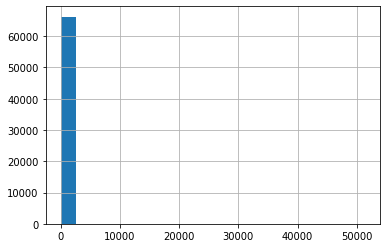

In [12]:
df_im.info()

df_im['runtime_minutes'].hist(bins=20) # there is clearly some outlier skewing the data

display(len(df_im[df_im['runtime_minutes']>300])) # 43 movies have a runtime longer than 300 minutes

When we exclude the 43 outliers, we get a much more normal distribution. We will assign the mean of the <300min length movies to the missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   test_key         73856 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


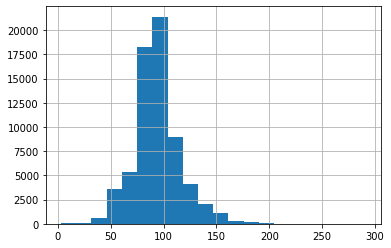

In [13]:
df_im['runtime_minutes'][df_im['runtime_minutes']<300].hist(bins=20)

repl = df_im['runtime_minutes'][df_im['runtime_minutes']<300].mean()
df_im['runtime_minutes'] = df_im['runtime_minutes'].fillna(repl)
df_im.info()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime_minutes', ylabel='roi'>

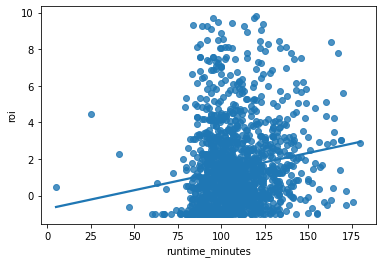

In [14]:
df_movie_budgets['test_key'] = df_movie_budgets['year'].astype(str) + " " + df_movie_budgets['movie'] 
test = pd.merge(df_im, df_movie_budgets, on='test_key')

test['roi'] = (test['worldwide_gross'] - test['production_budget']) / test['production_budget']
sns.regplot(test['runtime_minutes'][test['roi']<10], test['roi'][test['roi']<10], ci=None)

### Feature Engineering

Since any given movie can have multiple genres, I create a column for each genre. If a movie is of that genre, the value in that column will be 1, otherwise 0.

In [15]:
# Genre dictionary for Movie DB dataset
genre_dict = {'Action': '28', 
             'Adventure': '12', 
             'Animation': '16', 
             'Comedy': '35', 
             'Crime': '80',
             'Documentary': '99',
             'Drama': '18',
             'Family': '10751',
             'Fantasy': '14',
             'History': '36',
             'Horror': '27',
             'Music': '10402',
             'Mystery': '9648',
             'Romance': '10749',
             'Science Fiction': '878',
             'TV Movie': '10770',
             'Thriller': '53',
             'War': '10752',
             'Western': '37'}

# Transform genre ID to genre
def get_key(val):
    for key, value in genre_dict.items():
        if val == value:
            return key

df_movies['genre_ids'] = [genres.strip('][').split(', ') for genres in df_movies['genre_ids']]
df_movies['genre_list'] = [[get_key(val) for val in genres] for genres in df_movies['genre_ids']]

genre_list = list(genre_dict.keys())
import numpy as np
stringsCheck = genre_list
df_movies['genres'] = [','.join(map(str, l)) for l in df_movies['genre_list']]
for i in stringsCheck:
    df_movies[f'{i}'] = np.where(df_movies.genres.str.contains(f'{i}'), 1, 0)
    
display(df_movies.head())

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0


I will perform the same action for the IMDB database, in case we decide to use it later on in the analysis. We will also drop the rows with missing genre given they are a small percentage of the total dataset.

In [16]:
df_im.dropna(subset='genres', inplace=True) # drop rows with missing genre

df_im['genre_list'] = [genres.split(',') for genres in df_im['genres']]

genre_list = [item for sublist in df_im['genre_list'] for item in sublist]
genre_list = list(set(genre_list))

# create columns for genre category
import numpy as np
stringsCheck = genre_list
for i in stringsCheck:
    df_im[f'{i}'] = np.where(df_im.genres.str.contains(f'{i}'), 1, 0)

Here I create new variables to measure foreign revenues & profitability.

In [17]:
df_movie_budgets['foreign_gross'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['domestic_gross']
df_movie_budgets['profit'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']
df_movie_budgets['profit_margin'] = df_movie_budgets['profit'] / df_movie_budgets['worldwide_gross']
df_movie_budgets['roi'] = df_movie_budgets['profit'] / df_movie_budgets['production_budget']
df_movie_budgets['pct_foreign'] = df_movie_budgets['foreign_gross'] / df_movie_budgets['worldwide_gross']
df_movie_budgets['pct_foreign'] = df_movie_budgets['pct_foreign'].fillna(0) # null values due to 0 worldwide gross

df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
 8   test_key           5782 non-null   object        
 9   foreign_gross      5782 non-null   int64         
 10  profit             5782 non-null   int64         
 11  profit_margin      5782 non-null   float64       
 12  roi                5782 non-null   float64       
 13  pct_foreign        5782 non-null   float64       
dtypes: datet

### Merge Datasets

For reasons stated earlier, we will merge the `df_movies` and `df_movie_budgets` datasets.

In [18]:
df_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'year', 'test_key', 'genre_list', 'genres', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [19]:
df_movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year', 'month', 'test_key', 'foreign_gross',
       'profit', 'profit_margin', 'roi', 'pct_foreign'],
      dtype='object')

In [20]:
# create merge key to avoid potential duplicate titles
df_movies['match_key'] = df_movies['year'].astype(str) + " " + df_movies['original_title'] 
df_movie_budgets['match_key'] = df_movie_budgets['year'].astype(str) + " " + df_movie_budgets['movie']

# only keeping columns we need
df_movies = df_movies[['popularity', 'release_date', 'original_language', 
                       'vote_average', 'vote_count', 'genre_list', 'genres', 'Action', 'Adventure', 
                       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 
                       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 
                       'Western', 'match_key']]
df_movie_budgets = df_movie_budgets[['movie', 'year', 'production_budget', 'domestic_gross', 'foreign_gross', 
                                     'worldwide_gross', 'month', 'profit', 'profit_margin', 'roi', 
                                     'pct_foreign', 'match_key']]


# merge on key
df_final = pd.merge(df_movie_budgets, df_movies, on='match_key')

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1759 non-null   object        
 1   year               1759 non-null   int64         
 2   production_budget  1759 non-null   int64         
 3   domestic_gross     1759 non-null   int64         
 4   foreign_gross      1759 non-null   int64         
 5   worldwide_gross    1759 non-null   int64         
 6   month              1759 non-null   int64         
 7   profit             1759 non-null   int64         
 8   profit_margin      1759 non-null   float64       
 9   roi                1759 non-null   float64       
 10  pct_foreign        1759 non-null   float64       
 11  match_key          1759 non-null   object        
 12  popularity         1759 non-null   float64       
 13  release_date       1759 non-null   datetime64[ns]
 14  original

In [22]:
# Create CSV file with final dataset
df_final.to_csv('final_dataset.csv')

# Data Analysis

Given Microsoft's size, I make the assumption that they will not seek to create low budget films. I will also focus on films released in 2010 or later since we are more interested in how recent films have been performing. To determine what we should consider a low budget film, I calculate the interquartile range of production budgets and look at the first quartile. 

<AxesSubplot:>

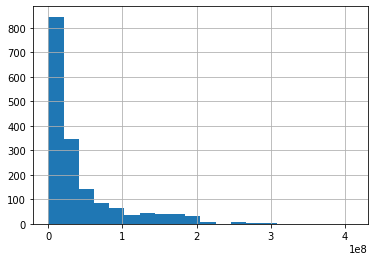

In [23]:
df_final[(df_final['year'] >= 2010)]['production_budget'].hist(bins=20) # distribution of movie budgets
# clear right skew - lots of movies at moderage budgets, few with very high budgets

<AxesSubplot:>

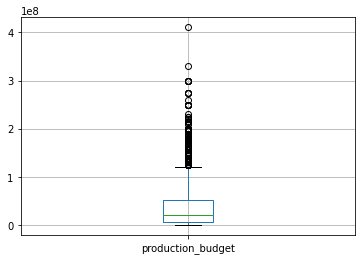

In [24]:
df_final[(df_final['year'] >= 2010)].boxplot(column='production_budget')

Since this data is skewed, we will use the interquartile range & quartiles to categorize the data. Based on this analysis, the Low Budget Film Category should be any movie with a budget less than $7,000,000

In [25]:
q1, q2, q3, q4 = np.percentile(df_final[(df_final['year'] >= 2010)]['production_budget'], [25, 50, 75, 100])
iqr = q3 - q1

print("Interquartile range:", iqr)
print("First Quartile:", q1)
print("Second Quartile:", q2) 
print("Third Quartile:", q3) 
print("Fourth Quartile:", q4) 

Interquartile range: 45250000.0
First Quartile: 7000000.0
Second Quartile: 21000000.0
Third Quartile: 52250000.0
Fourth Quartile: 410600000.0


Creating a dataset for movies released after 2010 which excludes low budget films.

In [26]:
df_final_subset = df_final[(df_final['year'] >= 2010) & (df_final['production_budget'] > 7000000)]

Add budget categorical variable. Since we removed low budget, we create med, high, and very high categories.

In [27]:
for k,v in df_final_subset.iterrows():
    if df_final_subset.loc[k, 'production_budget'] < 21000000:
        df_final_subset.loc[k, 'budget_category'] = 'medium'
    elif ((df_final_subset.loc[k, 'production_budget'] >= 21000000) & 
          (df_final_subset.loc[k, 'production_budget'] < 52250000)):
        df_final_subset.loc[k, 'budget_category'] = 'high'
    else:
        df_final_subset.loc[k, 'budget_category'] = 'very high'

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_21316/3950909464.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_subset.loc[k, 'budget_category'] = 'very high'


In [28]:
df_final_subset['year'].describe()

count    1260.000000
mean     2013.977778
std         2.526960
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: year, dtype: float64

Taking a look at the distribution of some of the other variables.

<AxesSubplot:>

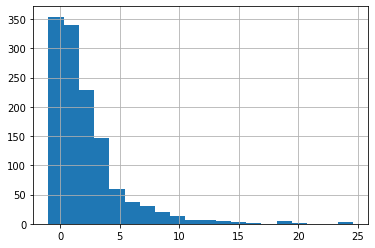

In [29]:
df_final_subset['roi'].hist(bins=20) # right skew

<AxesSubplot:>

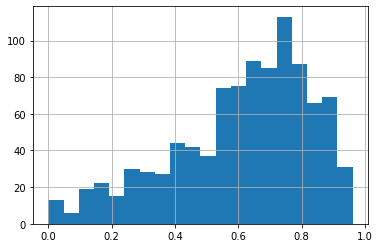

In [30]:
df_final_subset[df_final_subset['profit_margin'] >= 0]['profit_margin'].hist(bins=20) # slight left skew

### Seasonality

Both gross revenue and ROI data suggest that the summer months (May, June, July) and winter holidays (Nov, Dec) are the best time to release a movie. Foreign revenues tend to represent a larger percentage of revenues during these months as well.

In [31]:
season = pd.DataFrame()

season['month'] = list(set(df_final_subset['month']))
season['month_str'] = [datetime.datetime.strptime(str(month), "%m").strftime("%b") for month in season['month']]
season['avg_dom_gross'] = [(df_final_subset['domestic_gross'][df_final_subset['month']==month].mean()) 
                                for month in season['month']]
season['avg_fn_gross'] = [(df_final_subset['foreign_gross'][df_final_subset['month']==month].mean()) 
                                for month in season['month']]
season['avg_ww_gross'] = [(df_final_subset['worldwide_gross'][df_final_subset['month']==month].mean()) 
                                for month in season['month']]
season['avg_budget'] = [(df_final_subset['production_budget'][df_final_subset['month']==month].mean()) 
                                for month in season['month']]
season['roi'] = [(df_final_subset['roi'][df_final_subset['month']==month].median()) 
                                for month in season['month']]
season['pct_foreign'] = [(df_final_subset['pct_foreign'][df_final_subset['month']==month].mean()) 
                                for month in season['month']]

season = season.sort_values('month')

Text(0.5, 1.0, 'Average Grossed by Month')

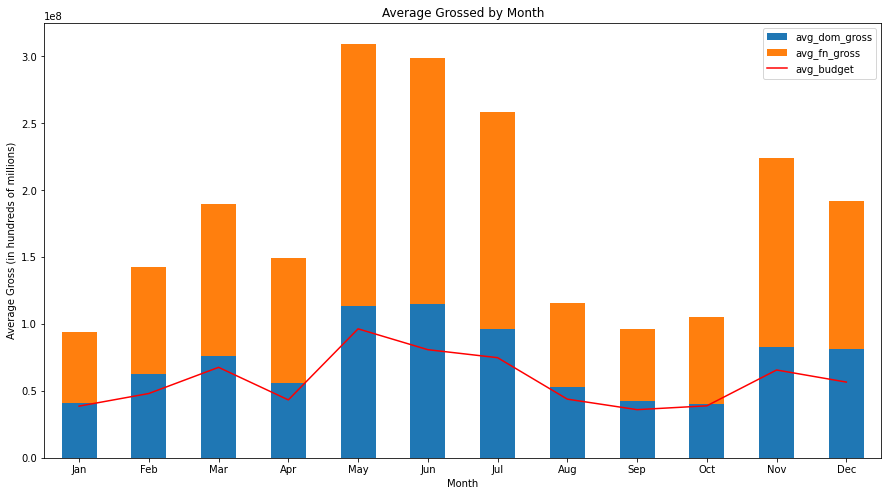

In [32]:
ax = season[['month_str', 'avg_dom_gross', 'avg_fn_gross']].plot(x='month_str', kind='bar', 
                                                                 figsize=(15,8), stacked=True)
season.plot(y='avg_budget', x='month_str', ax=ax, color='Red')
plt.xlabel('Month')
plt.ylabel('Average Gross (in hundreds of millions)')
plt.title('Average Grossed by Month')

# Fix Legend

Text(0.5, 1.0, 'Median ROI by Month')

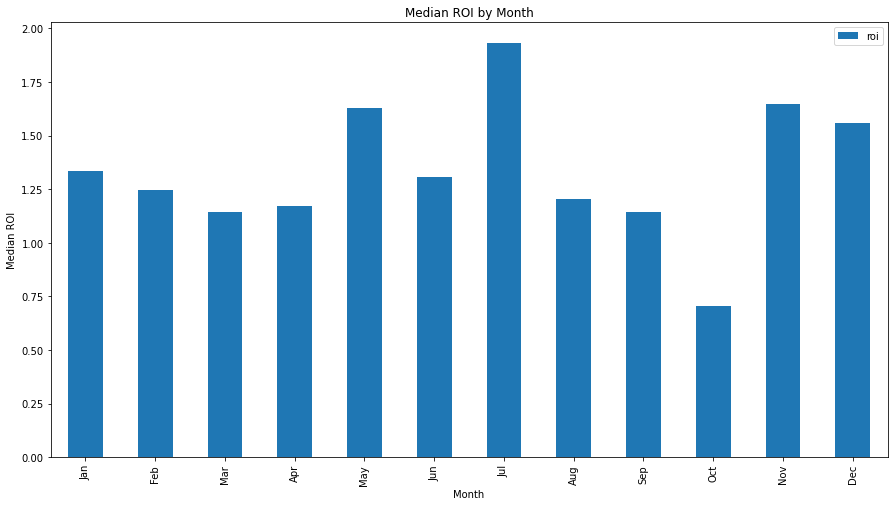

In [33]:
ax = season[['month_str', 'roi']].plot(x='month_str', kind='bar', figsize=(15,8))
plt.xlabel('Month')
plt.ylabel('Median ROI')
plt.title('Median ROI by Month')

# Jan a little more elevated vs other months, July sees big jump vs June, could just be a few outliers dragging
# this number higher

Text(0.5, 1.0, 'Average % Foreign Revenues by Month')

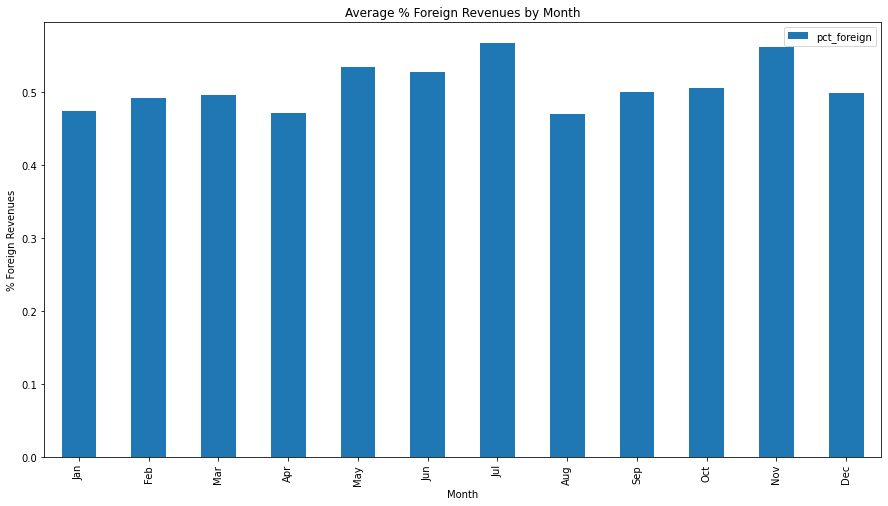

In [34]:
ax = season[['month_str', 'pct_foreign']].plot(x='month_str', kind='bar', figsize=(15,8))
plt.xlabel('Month')
plt.ylabel('% Foreign Revenues')
plt.title('Average % Foreign Revenues by Month')

In [35]:
#Create a score that combines reviews / profitability to pick best genres
#ROI by genre chart
#relationship between reviews and profit or roi

### Exploring Relationships

The data implies a positive correlation between movie popularity & ROI and vote average & ROI.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity', ylabel='roi'>

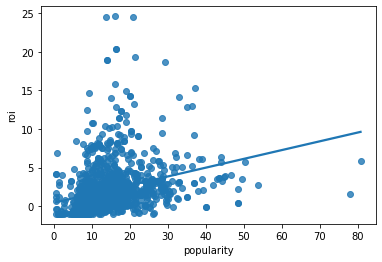

In [36]:
sns.regplot(df_final_subset['popularity'], df_final_subset['roi'], ci=None)

In [37]:
df_final_subset['roi'].describe()

count    1260.000000
mean        2.078917
std         3.140772
min        -1.000000
25%         0.125157
50%         1.324828
75%         2.952290
max        24.597236
Name: roi, dtype: float64

As we saw earlier, the ROI data is fairly skewed, so we will exclude some of the outliers to get a better representation of the data.

In [38]:
q1, q3 = np.percentile(df_final_subset['roi'], [25, 75])
iqr = q3 - q1

p95 = np.percentile(df_final_subset['roi'], 95)

print("Interquartile range:", iqr)
print("First Quartile:", q1) 
print("Third Quartile:", q3) 
print("95th Percentile:", p95) 

Interquartile range: 2.8271326874213836
First Quartile: 0.12515717924528302
Third Quartile: 2.952289866666667
95th Percentile: 8.0500023675


The positive slope of the regression line implies a positive relationship between a movie's popularity score and ROI.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity', ylabel='roi'>

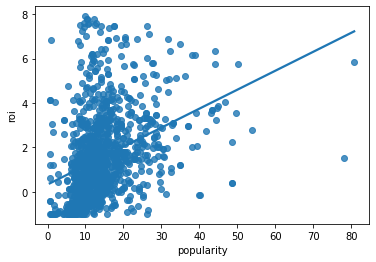

In [39]:
sns.regplot(df_final_subset['popularity'][df_final_subset['roi'] < 8], 
            df_final_subset['roi'][df_final_subset['roi'] < 8], ci=None)

Adding categories for budget shows us that medium budget films tend to have the lowest popularity scores, while high and very high budget films have greater popularity. There is also a big cluster of medium budget films among lower ROIs, but each budget category seems to include a full range of ROIs.

<Figure size 960x640 with 0 Axes>

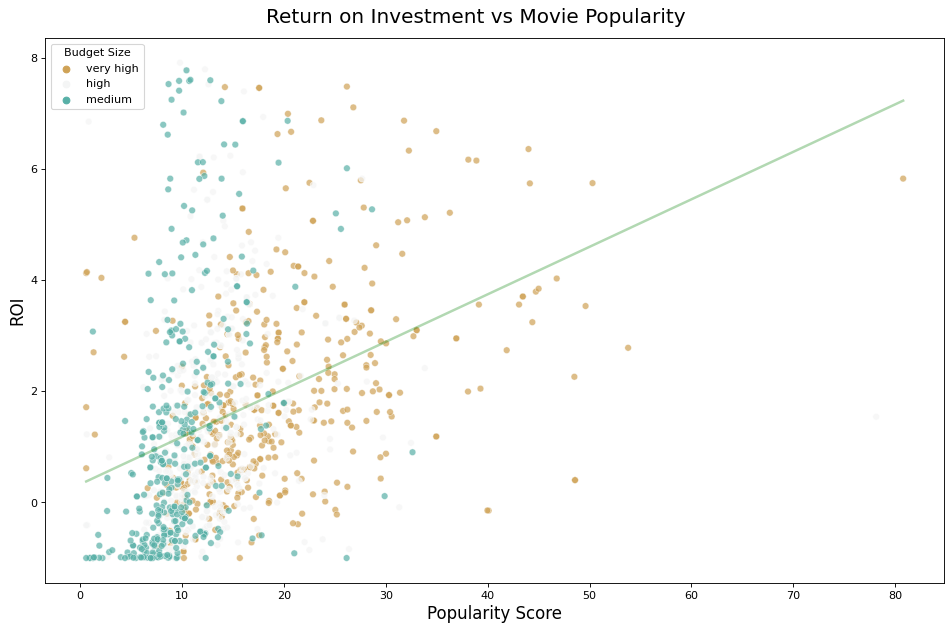

In [40]:
fig = plt.figure(figsize=(12, 8), dpi=80) 
fig, ax = plt.subplots(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plot = sns.scatterplot(x='popularity', y='roi', data=df_final_subset[df_final_subset['roi'] < 8],
                        hue=df_final_subset.budget_category, legend='full', alpha = .7,
                        palette="BrBG")

# adding regression line
sns.regplot(data=df_final_subset[df_final_subset['roi'] < 8], x='popularity', y='roi', scatter=False, 
            ax=ax, ci=False, color='g', line_kws={'alpha':0.3})

fig.suptitle("Return on Investment vs Movie Popularity", fontsize=18)
ax.set_xlabel("Popularity Score", fontsize=15)
ax.set_ylabel("ROI", fontsize=15)
ax.get_legend().set_title("Budget Size")

plt.tight_layout() 
plt.savefig("roi_popularity.png", format='png',dpi=150)

Now we will look at the relationship between a movie's voted rating and ROI.

<Figure size 960x640 with 0 Axes>

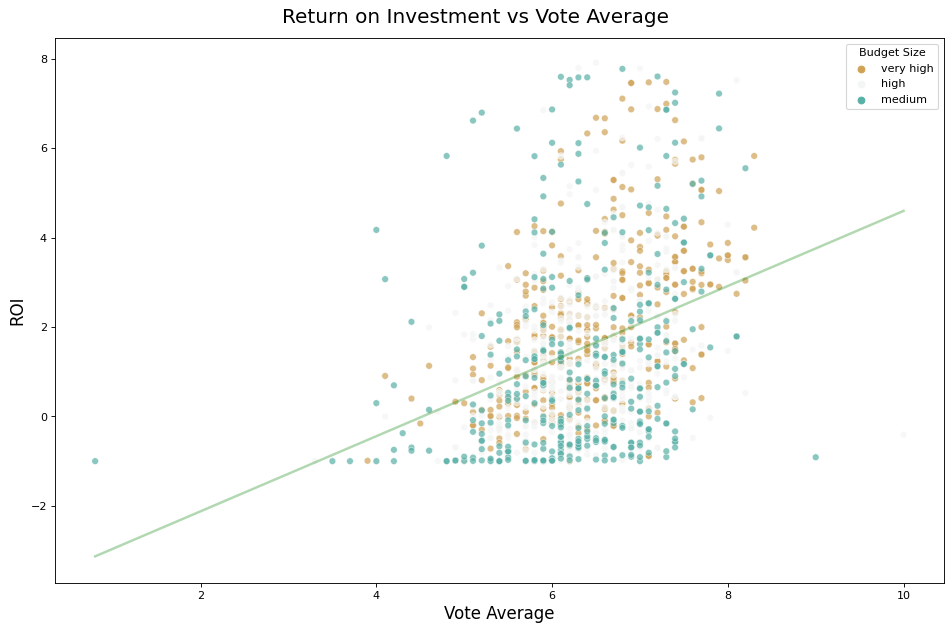

In [41]:
fig = plt.figure(figsize=(12, 8), dpi=80) 

fig, ax = plt.subplots(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plot = sns.scatterplot(x='vote_average', y='roi', data = df_final_subset[(df_final_subset['roi'] < 8)],
                       hue=df_final_subset.budget_category, legend='full', alpha = .7, palette="BrBG")
sns.regplot(data=df_final_subset[df_final_subset['roi'] < 8], x='vote_average', y='roi', scatter=False, 
            ax=ax, ci=False, color='g', line_kws={'alpha':0.3})

fig.suptitle("Return on Investment vs Vote Average", fontsize=18)
ax.set_xlabel("Vote Average", fontsize=15)
ax.set_ylabel("ROI", fontsize=15)
ax.get_legend().set_title("Budget Size")

plt.tight_layout() 

Excluding movies with ROI of -1 to make the plot a bit cleaner:

<Figure size 960x640 with 0 Axes>

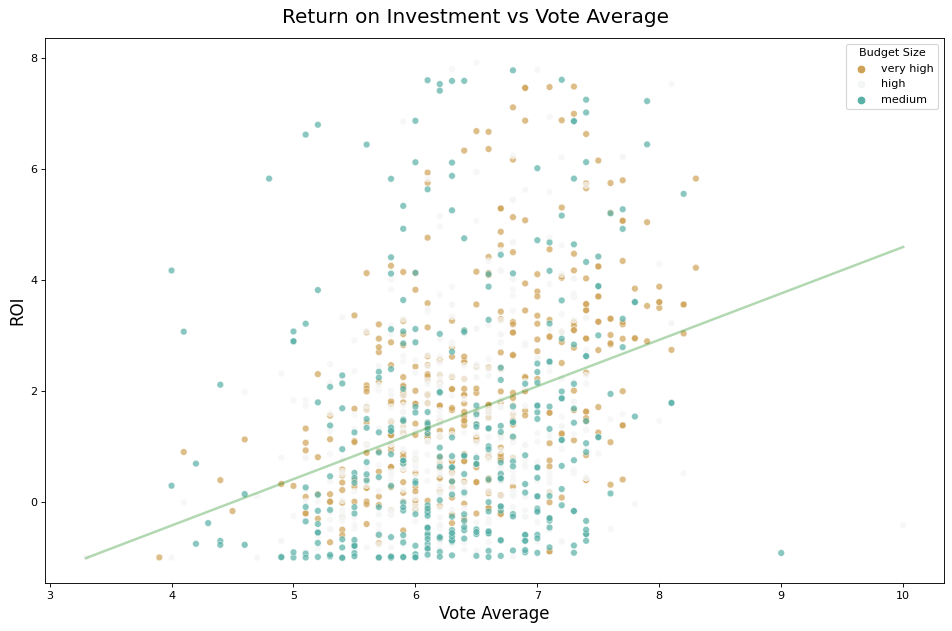

In [42]:
fig = plt.figure(figsize=(12, 8), dpi=80) 

fig, ax = plt.subplots(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plot = sns.scatterplot(x='vote_average', y='roi', 
                       data = df_final_subset[(df_final_subset['roi'] < 8) & (df_final_subset['roi'] > -1)],
                       hue=df_final_subset.budget_category, legend='full', alpha = .7, palette="BrBG")
sns.regplot(data=df_final_subset[(df_final_subset['roi'] < 8) & (df_final_subset['roi'] > -1)], 
            x='vote_average', y='roi', scatter=False, ax=ax, ci=False, color='g', line_kws={'alpha':0.3})

fig.suptitle("Return on Investment vs Vote Average", fontsize=18)
ax.set_xlabel("Vote Average", fontsize=15)
ax.set_ylabel("ROI", fontsize=15)
ax.get_legend().set_title("Budget Size")

plt.tight_layout() 
plt.savefig("roi_vote.png", format='png',dpi=150)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='production_budget', ylabel='roi'>

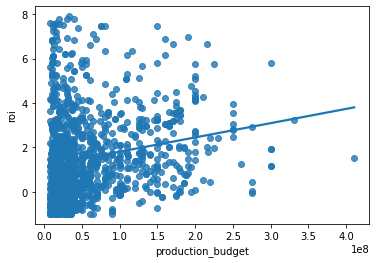

In [62]:
# budget vs roi

sns.regplot(df_final_subset['production_budget'][df_final_subset['roi'] < 8], 
            df_final_subset['roi'][df_final_subset['roi'] < 8], ci=None)

## Genre Analysis

Animation is the top scoring genre (incorporating popularity, vote average, ROI and profit margin). Horror movies tend to have very high returns on investment but yield lesser reviews.

In [44]:
print("Movies with more than one genre: " + str(len(df_final_subset[df_final_subset['genre_list'].str.len()>1])))
print("Movies with one genre: " + str(len(df_final_subset[df_final_subset['genre_list'].str.len()==1])))

Movies with more than one genre: 1067
Movies with one genre: 193


In [78]:
# Count of movies per genre
genres = pd.DataFrame()
genres['genre'] = list(set([item for sublist in df_final_subset['genre_list'] for item in sublist]))
# Why is there a None genre?
genres = genres[~genres['genre'].isnull()].reset_index()

genres['count'] = [sum(df_final_subset[f'{genre}']) for genre in genres['genre']]
genres['gross'] = [sum(df_final_subset['worldwide_gross'][df_final_subset[f'{genre}']==1]) 
                   for genre in genres['genre']]
genres['profit'] = [sum(df_final_subset['profit'][df_final_subset[f'{genre}']==1]) 
                    for genre in genres['genre']]
genres['avg_profit_per_movie'] = genres['profit'] / genres['count']
genres['avg_budget'] = [df_final_subset['production_budget'][df_final_subset[f'{genre}']==1].mean() 
                        for genre in genres['genre']]
genres['roi'] = [df_final_subset['roi'][df_final_subset[f'{genre}']==1].mean() for genre in genres['genre']]
genres['pct_foreign'] = [df_final_subset['pct_foreign'][df_final_subset[f'{genre}']==1].mean() 
                         for genre in genres['genre']]
genres['profit_margin'] = genres['profit'] / genres['gross']
genres['vote_avg'] = [df_final_subset['vote_average'][df_final_subset[f'{genre}']==1].mean() 
                      for genre in genres['genre']]
genres['popularity'] = [df_final_subset['popularity'][df_final_subset[f'{genre}']==1].mean() 
                        for genre in genres['genre']]

# budget category

for k,v in genres.iterrows():
    if genres.loc[k, 'avg_budget'] < 21000000:
        genres.loc[k, 'budget_category'] = 'medium'
    elif ((genres.loc[k, 'avg_budget'] >= 21000000) & 
          (genres.loc[k, 'avg_budget'] < 52250000)):
        genres.loc[k, 'budget_category'] = 'high'
    else:
        genres.loc[k, 'budget_category'] = 'very high'


Text(0.5, 1.0, 'Genres Ranked by Average ROI')

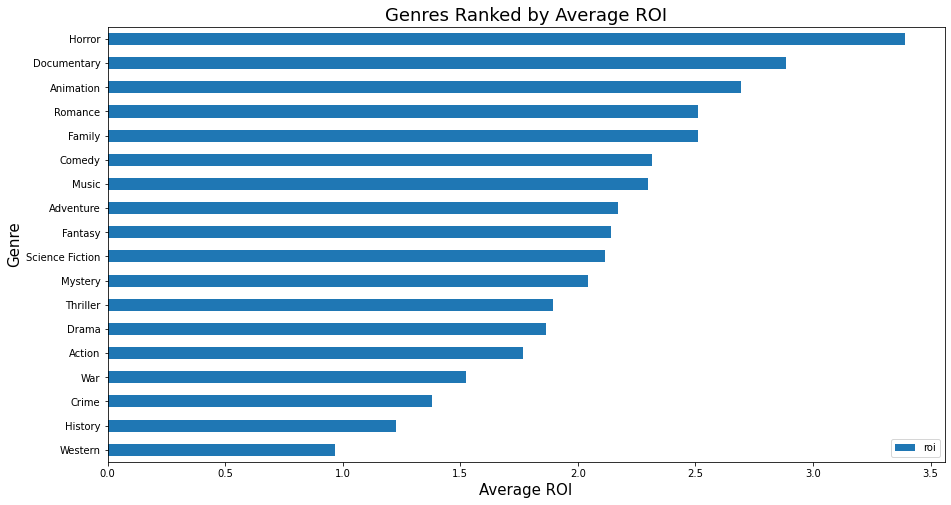

In [58]:
# Genre ranked by ROI

genres[['genre', 'roi']].sort_values('roi', ascending=True).plot(x='genre', kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Average ROI', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.title('Genres Ranked by Average ROI',fontsize=18)

Text(0.5, 1.0, 'Genres Ranked by Average Vote')

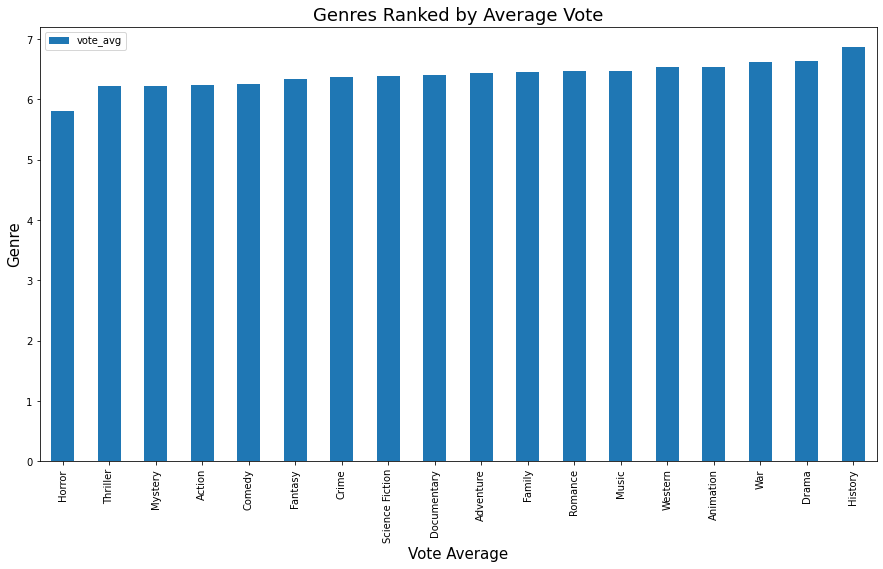

In [59]:
# Genre ranked by vote average - not a lot of differentiation

genres[['genre', 'vote_avg']].sort_values('vote_avg', ascending=True).plot(x='genre', kind='bar', 
                                                                           figsize=(15,8), stacked=True)
plt.xlabel('Vote Average', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.title('Genres Ranked by Average Vote',fontsize=18)

Text(0.5, 1.0, 'Genres Ranked by Popularity')

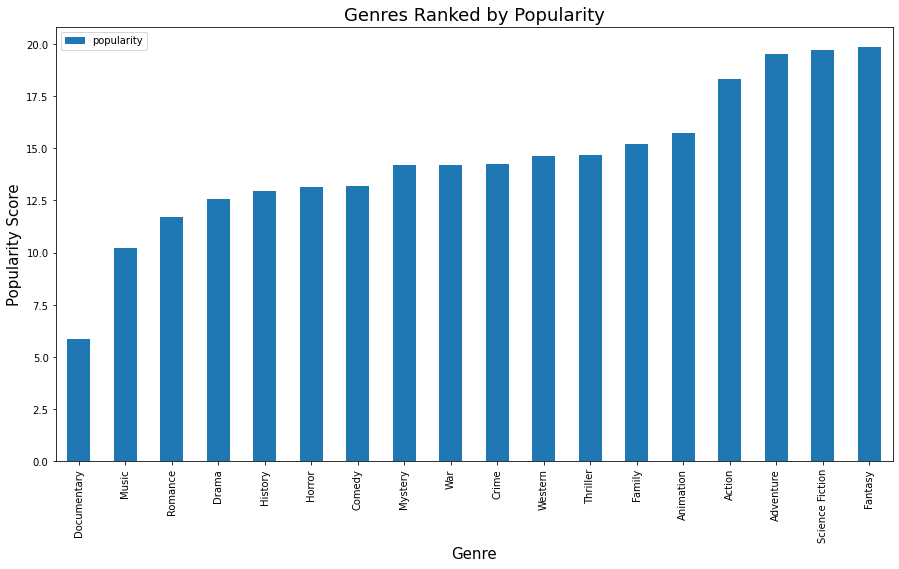

In [60]:
# Genre ranked by popularity

genres[['genre', 'popularity']].sort_values('popularity', ascending=True).plot(x='genre', kind='bar', 
                                                                           figsize=(15,8), stacked=True)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Popularity Score', fontsize=15)
plt.title('Genres Ranked by Popularity',fontsize=18)

Text(0.5, 1.0, 'Genres Ranked by Average Budget')

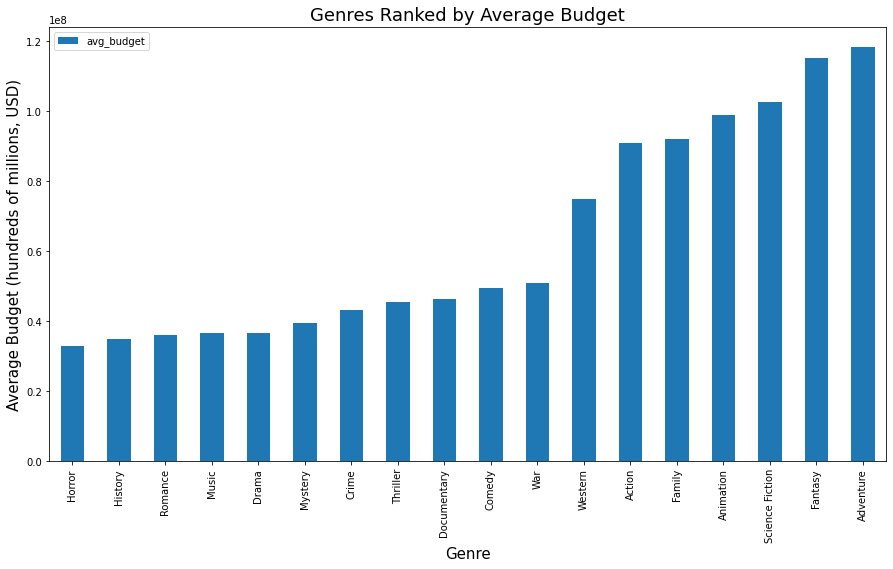

In [61]:
# Genre ranked by average budget

genres[['genre', 'avg_budget']].sort_values('avg_budget', ascending=True).plot(x='genre', kind='bar', 
                                                                           figsize=(15,8), stacked=True)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Average Budget (hundreds of millions, USD)', fontsize=15)
plt.title('Genres Ranked by Average Budget',fontsize=18)

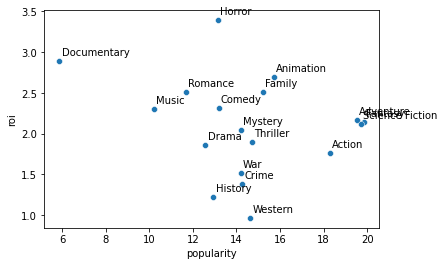

In [74]:
# Define variables for chart
gen = genres['genre']
popularity = genres['popularity']
vote_avg = genres['vote_avg']
roi = genres['roi']

plot = sns.scatterplot(x = 'popularity', y = 'roi', data=genres)

# Annotate label points 
for i, g in enumerate(gen):
    plt.annotate(g, (popularity[i]+0.1, roi[i]+0.07))
# popularity vs roi, labeled by genre, color for budget category

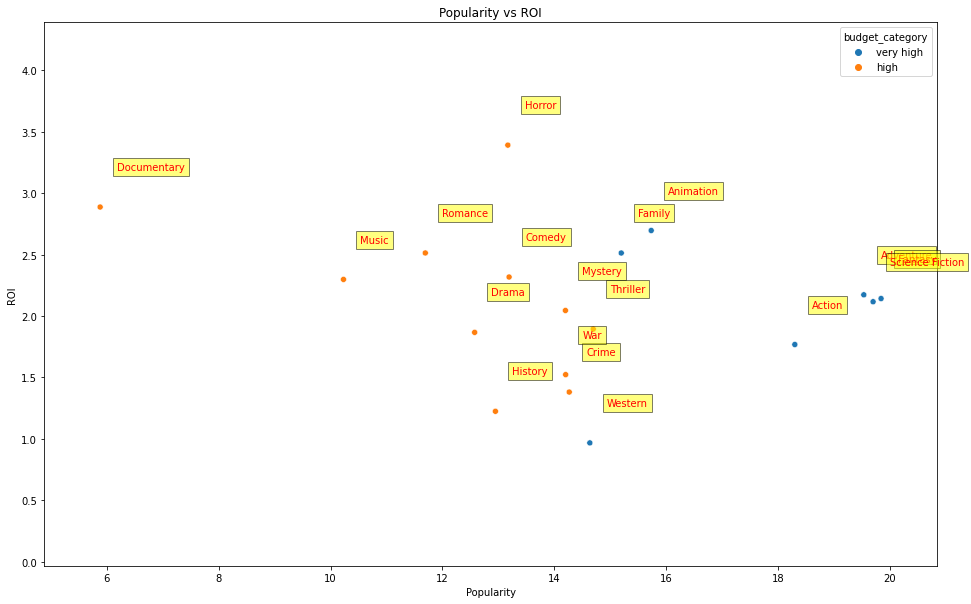

In [79]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=genres,x='popularity',y='roi', hue='budget_category')
for i in range(genres.shape[0]):
    plt.text(x=genres.popularity[i]+0.3,y=genres.roi[i]+0.3,s=genres.genre[i], fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))
plt.xlim(genres.popularity.min()-1,genres.popularity.max()+1)                #set x limit
plt.ylim(genres.roi.min()-1,genres.roi.max()+1)              #set y limit 
plt.title('Popularity vs ROI') #title
plt.xlabel('Popularity') #x label
plt.ylabel('ROI') #y label

plt.show()

I want to standardize the ROI, popularity and vote average values so that I can create a composite score & rank genres by that score.

In [ ]:
#call the standard scaler  
std_scaler = StandardScaler()
 
#fit the values to the function 
genres['roi_scaled'] = std_scaler.fit_transform(genres[['roi']].values)
genres['pm_scaled'] = std_scaler.fit_transform(genres[['profit_margin']].values)
genres['pop_scaled'] = std_scaler.fit_transform(genres[['popularity']].values)
genres['vote_scaled'] = std_scaler.fit_transform(genres[['vote_avg']].values)

# source: https://www.journaldev.com/54166/data-scaling-in-python

In [ ]:
genres['score'] = ((1/4) * genres['pm_scaled'] + (1/4) * genres['vote_scaled'] + 
                   (1/4) * genres['pop_scaled'] + (1/4) * genres['roi_scaled'])

In [ ]:
display(genres.sort_values('score', ascending=False)) 
# will exclude documentary category since there are only 3 in the data

genres = genres[genres['genre'] != 'Documentary']

In [ ]:
display(genres.sort_values('score', ascending=False)) 

## Studio Analysis

In [ ]:
# How many movies do the top studios produce per month? What genres do they specialize in?

df_movie_gross.info()
df_movie_info.info()

studio = df_movie_gross[['title','studio','year']].dropna(subset='studio')

In [ ]:
studio['match_key'] = studio['year'].astype(str) + " " + studio['title'] 
df_final_studio = pd.merge(df_final_subset, studio, on='match_key')

In [ ]:
df_final_studio.info()

In [ ]:
df_final_studio.columns

In [ ]:
studios = pd.DataFrame(df_final_studio.groupby(by='studio').agg({'original_title': 'count',
                                          'production_budget': np.mean,
                                         'domestic_gross': np.sum, 
                                         'foreign_gross': np.sum,
                                         'worldwide_gross': np.sum,
                                          'profit': np.mean,
                                          'roi': np.median,
                                          'profit_margin': np.mean,
                                          'vote_average': np.mean,
                                          'vote_count': np.mean,
                                          'popularity': np.mean,
                                          'Action': np.sum, 
                                          'Adventure': np.sum, 
                                          'Animation': np.sum, 
                                          'Comedy': np.sum, 
                                          'Crime': np.sum, 
                                          'Documentary': np.sum, 
                                          'Drama': np.sum, 
                                          'Family': np.sum,
                                          'Fantasy': np.sum, 
                                          'History': np.sum, 
                                          'Horror': np.sum, 
                                          'Music': np.sum, 
                                          'Mystery': np.sum, 
                                          'Romance': np.sum,
                                          'Science Fiction': np.sum, 
                                          'TV Movie': np.sum, 
                                          'Thriller': np.sum, 
                                          'War': np.sum, 
                                          'Western': np.sum}))
                                        

In [ ]:
studios['roi_scaled'] = std_scaler.fit_transform(studios[['roi']].values)
studios['pm_scaled'] = std_scaler.fit_transform(studios[['profit_margin']].values)
studios['pop_scaled'] = std_scaler.fit_transform(studios[['popularity']].values)
studios['vote_scaled'] = std_scaler.fit_transform(studios[['vote_average']].values)

studios['score'] = (1/4) * studios['pm_scaled'] + (1/4) * studios['vote_scaled'] + (1/4) * studios['pop_scaled'] + (1/4) * studios['roi_scaled']

In [ ]:
studios[studios['original_title'] > 5].sort_values('score', ascending=False).to_csv('studios_ranked.csv')

In [ ]:
# Count of movies per genre


# Key Findings

There are many ways in which Microsoft can create a successful movie studio. Here are my recommendations based on this project's analysis:
- Aim to release in summer or winter, as movies that hit the theatre during this times yield the biggest revenues and returns on investment.
- Produce animated films if you seek to balance both positive reviews and return on investment / profit margins. If you are solely focused on ROI, horror is the top scoring genre. In general, positive reviews tend to produce better returns, however this is not always the case.
- While popularity tends to increase with budget size, a movie's average vote seems to be evenly distributed among budget sizes, implying other factors (movie quality, for example) not visible in this analysis that impact voted rating


## Top 20 Movies Analysis

In [ ]:
top_20_gross_mb = df_movie_budgets.sort_values('worldwide_gross', ascending=False).head(20)
top_20_gross_mb = top_20_gross_mb.sort_values('worldwide_gross', ascending=True)
top_20_gross_mb

In [ ]:
top_20_gross_mb[['movie', 'domestic_gross', 'foreign_gross']].plot(x='movie', kind='barh', figsize=(15,8), 
                                                                   stacked=True)
plt.xlabel('Total Gross in USD (billions)', fontsize=15)
plt.ylabel('Movie Title', fontsize=15)
plt.title('Top 20 Grossing Movies',fontsize=18)

In [ ]:
top_20_gross_recent = df_movie_budgets_recent.sort_values('worldwide_gross', ascending=False).head(20)
top_20_gross_recent = top_20_gross_recent.sort_values('worldwide_gross', ascending=True)
top_20_gross_recent

In [ ]:
top_20_gross_recent[['movie', 'domestic_gross', 'foreign_gross']].plot(x='movie', kind='barh', 
                                                                       figsize=(15,8), stacked=True)
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies')

In [ ]:
top_20_gross_domestic = df_movie_budgets.sort_values('domestic_gross', ascending=False).head(20)
top_20_gross_domestic = top_20_gross_domestic.sort_values('domestic_gross', ascending=True)

In [ ]:
top_20_gross_domestic[['movie', 'domestic_gross']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies - Domestic')

In [ ]:
top_20_gross_mb_profit = df_movie_budgets.sort_values('profit_margin', ascending=False).head(20)
top_20_gross_mb_profit = top_20_gross_mb_profit.sort_values('profit_margin', ascending=True)

In [ ]:
top_20_gross_mb_roi = df_movie_budgets.sort_values('roi', ascending=False).head(20)
top_20_gross_mb_roi = top_20_gross_mb_roi.sort_values('roi', ascending=True)

top_20_gross_mb_roi[['movie', 'roi']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Return on Investment')
plt.ylabel('Movie Title')
plt.title('Movies with Highest ROI')

In [ ]:
# Top ROI after 2010
top_20_gross_mb_roi_recent = df_movie_budgets_recent.sort_values('roi', ascending=False).head(20)
top_20_gross_mb_roi_recent = top_20_gross_mb_roi_recent.sort_values('roi', ascending=True)

top_20_gross_mb_roi_recent[['movie', 'roi']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Return on Investment')
plt.ylabel('Movie Title')
plt.title('Movies with Highest ROI')

In [ ]:
# Top ROI, budget greater than 5mm
top_20_gross_mb_roi_5mm = df_movie_budgets[df_movie_budgets['production_budget'] > 
                                           5000000].sort_values('roi', ascending=False).head(20)
top_20_gross_mb_roi_5mm = top_20_gross_mb_roi_5mm.sort_values('roi', ascending=True)

#display(top_20_gross_mb_roi_1mm[['movie','release_date','production_budget','worldwide_gross']])

top_20_gross_mb_roi_5mm[['movie', 'roi']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Return on Investment')
plt.ylabel('Movie Title')
plt.title('Movies with Highest ROI, Budget > $5,000,000')

In [ ]:
# Top ROI, budget greater than 5mm
top_20_gross_mb_roi_5mm = df_movie_budgets_recent[df_movie_budgets['production_budget'] > 
                                                  5000000].sort_values('roi', ascending=False).head(20)
top_20_gross_mb_roi_5mm = top_20_gross_mb_roi_5mm.sort_values('roi', ascending=True)

#display(top_20_gross_mb_roi_1mm[['movie','release_date','production_budget','worldwide_gross']])

top_20_gross_mb_roi_5mm[['movie', 'roi']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Return on Investment')
plt.ylabel('Movie Title')
plt.title('Movies with Highest ROI, Budget > $5,000,000')

## Getting Genres Out

In [ ]:
display(df_im.info())
display(df_movies.info())

In [ ]:
df_action = df_genres[df_genres['Action']==1]
df_action.plot.scatter(x='year',y='worldwide_gross')
# different color for each genre?
# https://www.statology.org/matplotlib-trendline/

In [ ]:
df_adventure = df_genres[df_genres['Adventure']==1]
df_adventure.plot.scatter(x='year',y='worldwide_gross')

In [ ]:
df_drama = df_genres[df_genres['Drama']==1]
#df_drama.plot.scatter(x='year',y='worldwide_gross')

import seaborn as sns

#create scatterplot with regression line
subset = df_drama[df_drama['year']>1980]
sns.regplot(subset['year'], subset['profit'], ci=None)

In [ ]:
# average profit per yr

action = pd.DataFrame()
action['year'] = list(set(df_action['year']))
action['avg_profit'] = [(df_action['profit'][df_action['year']==year].mean()) 
                                for year in action['year']]

action[action['year']>1980].plot(x='year',y='avg_profit')



In [ ]:
drama = pd.DataFrame()
drama['year'] = list(set(df_drama['year']))
drama['avg_profit'] = [(df_drama['profit'][df_drama['year']==year].mean()) 
                                for year in drama['year']]
drama.plot(x='year',y='avg_profit')

In [ ]:
df_action.columns

In [ ]:
display(df_im['primary_title'].nunique())
display(len(df_im))
#df_im.sort_values('primary_title',ascending=False).head(30)
df_im[df_im.duplicated(subset=['primary_title'], keep=False)].sort_values('primary_title').tail(10)
df_im[df_im.duplicated(subset=['movie_id'], keep=False)] # no duplicated movie ids

In [ ]:
df_im['key'] = df_im['primary_title'] + " " + df_im['start_year'].astype(str)
df_movie_budgets['key'] = df_movie_budgets_simple['movie'] + " " + df_movie_budgets['year'].astype(str)

In [ ]:
display(df_im['key'].nunique())
display(len(df_im))

In [ ]:
df_im.head()
df_im.to_csv('df_im.csv')
#df_movie_budgets_simple.head()

In [ ]:
df_total1 = df_movie_budgets.merge(df_im, how='left', left_on='movie', right_on='original_title')
df_total1.info()



In [ ]:
df_total = df_movie_budgets.merge(df_im, how='left', on='key')

df_total.head()
df_total.info()
# adding in movie budgets

#df_total_2 

In [ ]:
#df_movie_budgets_simple.head()
#df_total2 = df_total.merge(df_movie_budgets_simple, how='left', left_on='title', right_on='movie')
#df_total2.info()

In [ ]:
df_total.columns

# Other columns to potentially add: budget / profit margin , return, movie rating

In [ ]:
# Genres

df_drama = df_total[df_total['Drama'] != 0]
df_action = df_total[df_total['Action'] != 0]
print('Action movies average gross: ', df_action['total_gross'].mean())
print('Drama movies average gross: ', df_drama['total_gross'].mean())

# What should be the cutoff point for minimum number of votes to use rating?
plt.hist(df_drama['numvotes'], bins=20)
df_drama['numvotes'].mean() - (df_drama['numvotes'].std()) # negative b/c left skew, just going to pick 100 

print('Action movies average rating (num votes > 100): ', df_action['averagerating'][df_action['numvotes'] > 100].mean())
print('Drama movies average rating (num votes > 100): ', df_drama['averagerating'][df_drama['numvotes'] > 100].mean())

# also want to look at how many action movies have multiple genres, and whether having multiple genres affects 

In [ ]:
df_movie_info.info() 
# Too few entries, probably not going to use this unless I am missing the information elsewhere

In [ ]:
df_total2.sort_values('total_gross', ascending=False).head(20)

In [ ]:
# In the last decade, horror/thriller/mystery seem to garner biggest ROI, despite low popularity / reviews
# Adventure category is highest grossing but animation takes the lead in terms of avg profit per movie made
# While drama has seen the most number of movies produced since 2010, it is among the least profitable
# Adventure is highest grossing, second most profitable. Animation is most profitable, ROI fairly high as well
# animations seems like perfect movie for Microsoft

# Seasonality: summer months are best time to put out a movie, both in terms of gross profit and ROI

In [ ]:
# show genre, rating for each of these movies
top_20_gross_mb_roi

## Appendix

In [ ]:
## Not Useful Visualization

top_20_gross_mb_profit[['movie', 'profit_margin']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Profit Margin')
plt.ylabel('Movie Title')
plt.title('Movies with Highest Profit Margin')

### Exploring Movie Gross Dataset

In [ ]:
display(df_movie_gross.info())
# Data types look OK except for foreign_gross - should be an int or float, going to look into this column a bit more
# I also think it makes sense to include a total_gross column, once we convert this datatype will add new column
# foreign gross has lots of NaNs, studio and domestic have a few

# Checking for NAs
sum(df_movie_gross['foreign_gross'].isna()) # There are 1,350 NAs, in a normal situation would delete this column
                                            # but this is probably useful info, considering replacing these with 0

display(df_movie_gross[df_movie_gross['foreign_gross'].isna()].sample(5)) # Shouldn't replace these with 0, will create a 
                                                                 # dataset that doesn't have NaN for foreign box office

display(df_movie_gross[df_movie_gross['studio'].isna()])
display(df_movie_gross[df_movie_gross['domestic_gross'].isna()]) # Going to exclude these
df_movie_gross = df_movie_gross[(df_movie_gross['studio'].isna() == False) & 
                                (df_movie_gross['domestic_gross'].isna() == False)]
df_movie_gross_complete = df_movie_gross[df_movie_gross['foreign_gross'].isna() == False]


#[float(x) for x in df_movie_gross['foreign_gross']] # looks like there are commas in here, 
# will need to get rid of these
df_movie_gross_complete['foreign_gross'] = [float(str(x).replace(',','')) 
                                            for x in df_movie_gross_complete['foreign_gross']]
df_movie_gross_complete.info()

df_movie_gross_complete['total_gross'] = df_movie_gross_complete['domestic_gross'] + df_movie_gross_complete['foreign_gross']
df_movie_gross_complete.head()

top_20_total_gross = df_movie_gross_complete.sort_values('total_gross', ascending=False).head(20)
top_20_total_gross = top_20_total_gross.sort_values('total_gross', ascending=True)

In [ ]:
df_movie_gross_complete[df_movie_gross_complete['title'].str.contains('Iron')]

In [ ]:
top_20_total_gross[['title', 'domestic_gross', 'foreign_gross']].plot(x='title', kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies')

## Seems to be missing some of the top grossing movies of all time, will see if there is another data set 
## with better data

### IMDB Dataset - Decided Against Using It

In [ ]:
# don't need this variable


In [ ]:
df_im['match_key'] =  df_im['start_year'].astype(str) + " " + df_im['primary_title']
df_movie_budgets['match_key'] = df_movie_budgets['year'].astype(str) + " " + df_movie_budgets['movie'] 

df_final = pd.merge(df_im, df_movie_budgets, on='match_key')

# only keeping columns we need
df_final = df_final[['primary_title', 'runtime_minutes', 'genres', 'averagerating', 'numvotes',
                     'release_date', 'production_budget','domestic_gross', 'foreign_gross', 'worldwide_gross', 
                     'month', 'year', 'profit', 'profit_margin', 'roi', 'Musical', 'Thriller', 'Short', 
                     'Mystery', 'Drama', 'News', 'Sport', 'Horror', 'Crime', 'Family', 'Romance', 'Adult', 
                     'Game-Show', 'Documentary', 'History', 'Sci-Fi', 'Action', 'Reality-TV', 'Fantasy',
                     'Biography', 'War', 'Western', 'Adventure', 'Animation', 'Comedy', 'Music']]

### Original Data Analysis

In [ ]:
## Distribution of Movie Budgets
df_movie_budgets['production_budget'].hist(bins=20)

In [ ]:
top_20_gross = df_final.sort_values('worldwide_gross', ascending=False).head(20)
top_20_gross = top_20_gross.sort_values('worldwide_gross', ascending=True)

top_20_gross[['primary_title', 'domestic_gross', 'foreign_gross']].plot(x='primary_title', kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies')

top_20_gross

In [ ]:
top_20_gross_test = test3.sort_values('worldwide_gross', ascending=False).head(20)
top_20_gross_test = top_20_gross_test.sort_values('worldwide_gross', ascending=True)

top_20_gross_test[['movie', 'domestic_gross', 'foreign_gross']].plot(x='movie', kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies')

top_20_gross_test

In [ ]:
## Adding Year and Month Variables to Track Seasonality

# If it was a string:
#df_movie_budgets['year'] = [int(date[-4:]) for date in df_movie_budgets['release_date']]
#df_movie_budgets['month'] = [date[:3] for date in df_movie_budgets['release_date']]

# Datetime object
df_movie_budgets['year'] = pd.DatetimeIndex(df_movie_budgets['release_date']).year
df_movie_budgets['month'] = pd.DatetimeIndex(df_movie_budgets['release_date']).month

df_movie_budgets.head()

In [ ]:
# Are there differences in rating and number of reviews or genre assignment?
display(df_movies[df_movies['original_title']=='Harry Potter and the Deathly Hallows: Part 1']) 
display(df_im[df_im['original_title']=='Harry Potter and the Deathly Hallows: Part 1'])

In [ ]:
## NEED TO FIGURE OUT HOW TO DEAL WITH DIFFERENT VERSIONS OF SAME TITLE

display(df_movie_gross[df_movie_gross['title'].str.contains('Star Wars')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Star Wars')])
display(df_movies[df_movies['original_title'].str.contains('Star Wars')])
display(df_im[df_im['original_title'].str.contains('Star Wars')])

display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Avatar')])
display(df_im[df_im['original_title'].str.contains('Avatar')])
display(df_movies[df_movies['original_title'].str.contains('Avatar')])

In [ ]:
# attempt at fuzzy matching - source https://towardsdatascience.com/how-to-perform-approximate-string-matching-in-one-line-of-code-76fae5d7efc
$ pip install fuzzywuzzy
from fuzzywuzzy import fuzz

# Perform fuzzy string matching
tuples_list = [max([(fuzz.token_set_ratio(i,j),j) for j in df_movies['original_title']]) 
               for i in df_movie_budgets['movie']]

# Unpack list of tuples into two lists
similarity_score, fuzzy_match = map(list,zip(*tuples_list))
# Create pandas DataFrame
df = pd.DataFrame({"list_A":df_movie_budgets['movie'], "fuzzy match": fuzzy_match, 
                   "similarity score":similarity_score})

df.head()

In [ ]:
display(df_movie_gross_complete[df_movie_gross_complete['title'].str.contains('Avengers')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Avengers')])
df_movie_budgets['year'] = [int(date[-4:]) for date in df_movie_budgets['release_date']]

display(df_movie_gross_complete[df_movie_gross_complete['title'].str.contains('Star Wars')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Star Wars')])

In [ ]:
#season['month_num'] = [datetime.datetime.strptime(month, "%b").month for month in season['month']]

In [ ]:
recent = df_genres[df_genres['year'] >= 2010]
recent.info()

#recent.genre_list.map(len)
print("Movies with more than one genre: " + str(len(recent[recent['genre_list'].str.len()>1])))
print("Movies with one genre: " + str(len(recent[recent['genre_list'].str.len()==1])))
#recent['genres'].value_counts()

#df_genres_clean = df_genres.dropna(subset='genre_list') #drop NAs for now
recent_clean = recent.dropna(subset='genre_list')

In [ ]:
genres['score'] = ((1/2)*(genres['roi'] - min(genres['roi'])/(max(genres['roi']) - min(genres['roi']))))*10 + ((1/2)*(genres['popularity'] - min(genres['popularity'])/(max(genres['popularity']) - min(genres['popularity']))))*10


In [ ]:
### DO NOT USE THESE
#genres.plot.scatter(x='vote_avg',y='roi') # edit dot size for number of movies, label genre?
sns.regplot(genres['vote_avg'], genres['roi'], ci=None)

In [ ]:
genres.plot.scatter(x='vote_avg',y='avg_profit_per_movie')

In [ ]:
## USE THIS
#genres.plot.scatter(x='popularity',y='avg_profit_per_movie')
sns.regplot(genres['popularity'], genres['avg_profit_per_movie'], ci=None)

In [ ]:
genres.plot.scatter(x='popularity',y='roi')

In [ ]:
# get rid of extra columns 
#df_final['year'] = df_final['year_x']
#df_final['release_date'] = df_final['release_date_x']

#df_final = df_final.drop(columns=['year_x','year_y','release_date_x','release_date_y'])

In [ ]:
df_final_subset[df_final_subset['Horror']==1].sort_values('roi', ascending=False).to_csv('Horror.csv')